In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_excel("2020.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2020,17191,216,32,3511
1,2020,17403,319,25,3508
2,2020,17397,281,35,3551
3,2020,17402,65,22,3504
4,2020,17926,241,27,3565
...,...,...,...,...,...
1899,2020,18035,340,38,3501
1900,2020,17991,47,22,3514
1901,2020,17981,361,32,3525
1902,2020,17945,168,23,3566


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1904, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1904 non-null   int64
 1   Maximum length (m))  1904 non-null   int64
 2   Recession(m),        1904 non-null   int64
 3   Rate/yr(m)           1904 non-null   int64
 4   Snout altitude (m)   1904 non-null   int64
dtypes: int64(5)
memory usage: 74.5 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1904


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2020,17191,216,32,3511
1,2020,17403,319,25,3508
2,2020,17397,281,35,3551
3,2020,17402,65,22,3504
4,2020,17926,241,27,3565


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0264,0.0349,-0.0094
"Recession(m),",NaN,0.0264,1.0000,0.0241,0.0053
Rate/yr(m),NaN,0.0349,0.0241,1.0000,-0.0184
Snout altitude (m),NaN,-0.0094,0.0053,-0.0184,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0349
Recession(m),          0.0264
Snout altitude (m)    -0.0094
Year                      NaN
Name: Maximum length (m)), dtype: float64

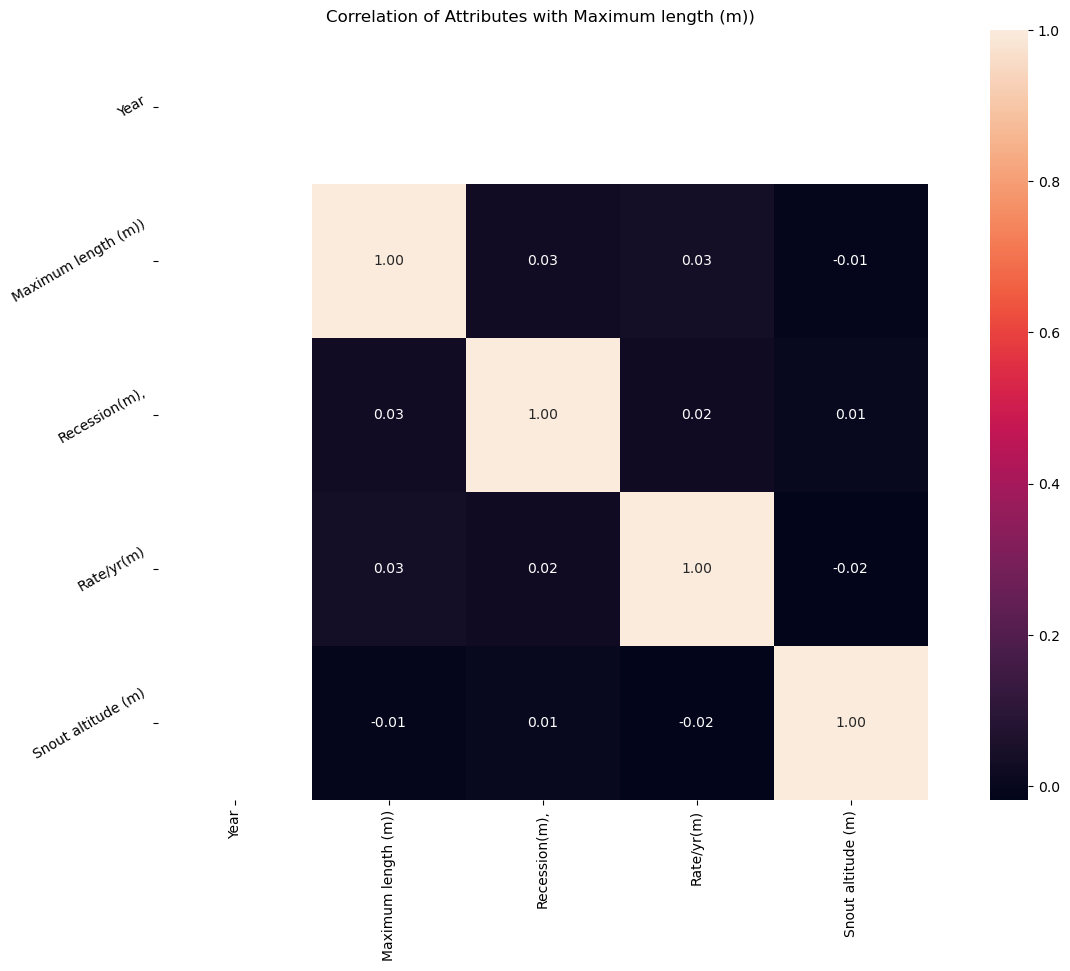

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,904.0000","1,904.0000","1,904.0000","1,904.0000","1,904.0000"
mean,"2,020.0000","17,550.4449",218.7306,27.3456,"3,532.1828"
std,0.0000,295.3932,126.6210,8.5076,20.1056
min,"2,020.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,020.0000","17,302.7500",109.0000,20.0000,"3,515.0000"
50%,"2,020.0000","17,548.5000",219.0000,27.0000,"3,532.0000"
75%,"2,020.0000","17,804.2500",329.0000,35.0000,"3,549.2500"
max,"2,020.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2020   1.0000
Name: Year, dtype: float64

95    0.0063
161   0.0058
87    0.0058
199   0.0058
341   0.0053
       ...  
301   0.0005
279   0.0005
122   0.0005
64    0.0005
390   0.0005
Name: Recession(m),, Length: 438, dtype: float64

18   0.0420
33   0.0394
24   0.0389
28   0.0383
22   0.0378
27   0.0378
34   0.0362
23   0.0362
32   0.0352
14   0.0347
25   0.0347
17   0.0341
19   0.0341
37   0.0336
40   0.0326
26   0.0326
16   0.0320
38   0.0320
20   0.0315
39   0.0315
29   0.0305
42   0.0305
36   0.0305
41   0.0299
35   0.0299
15   0.0299
30   0.0299
21   0.0294
13   0.0278
31   0.0263
Name: Rate/yr(m), dtype: float64

3555   0.0210
3531   0.0200
3521   0.0189
3535   0.0184
3546   0.0184
        ...  
3564   0.0100
3557   0.0100
3551   0.0100
3503   0.0084
3496   0.0016
Name: Snout altitude (m), Length: 72, dtype: float64



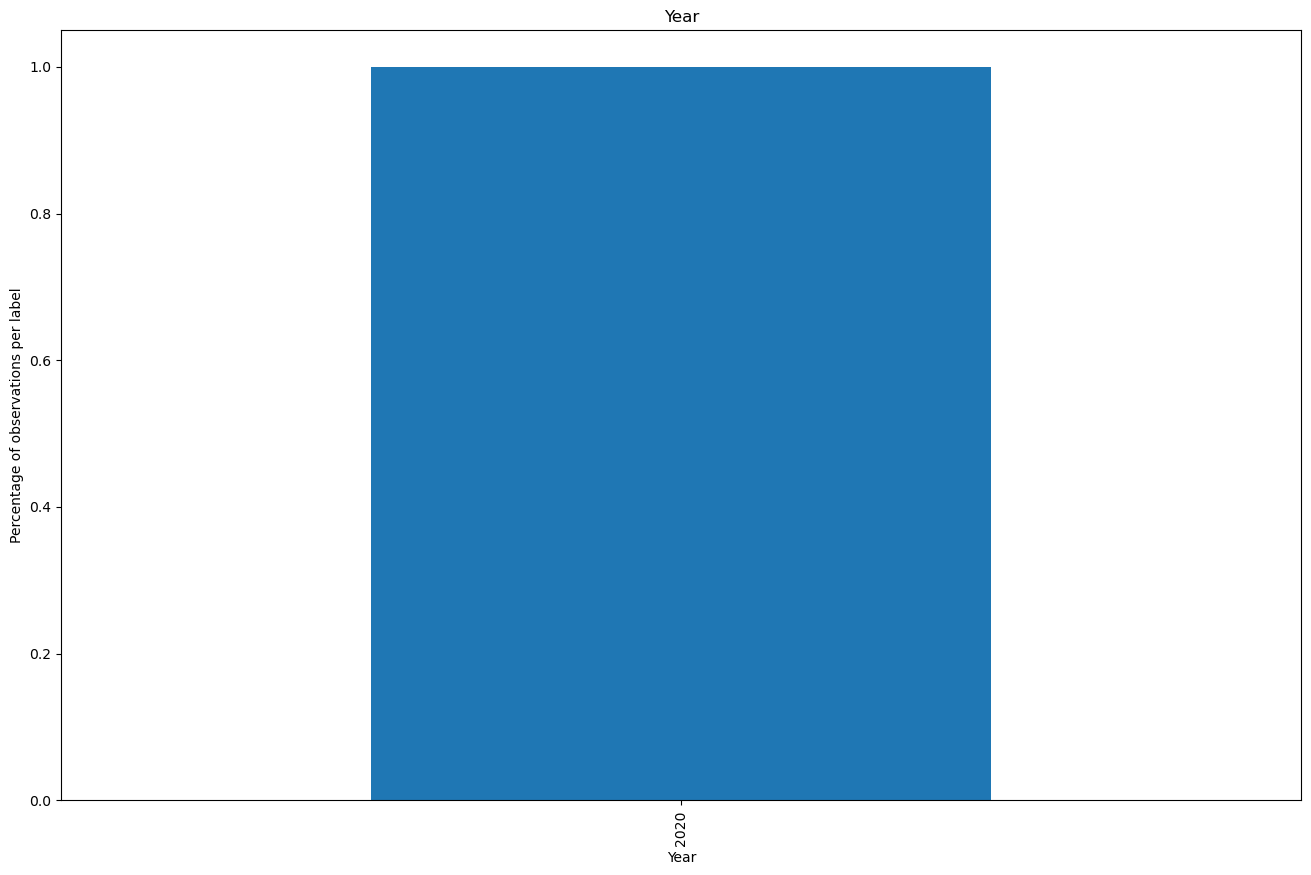

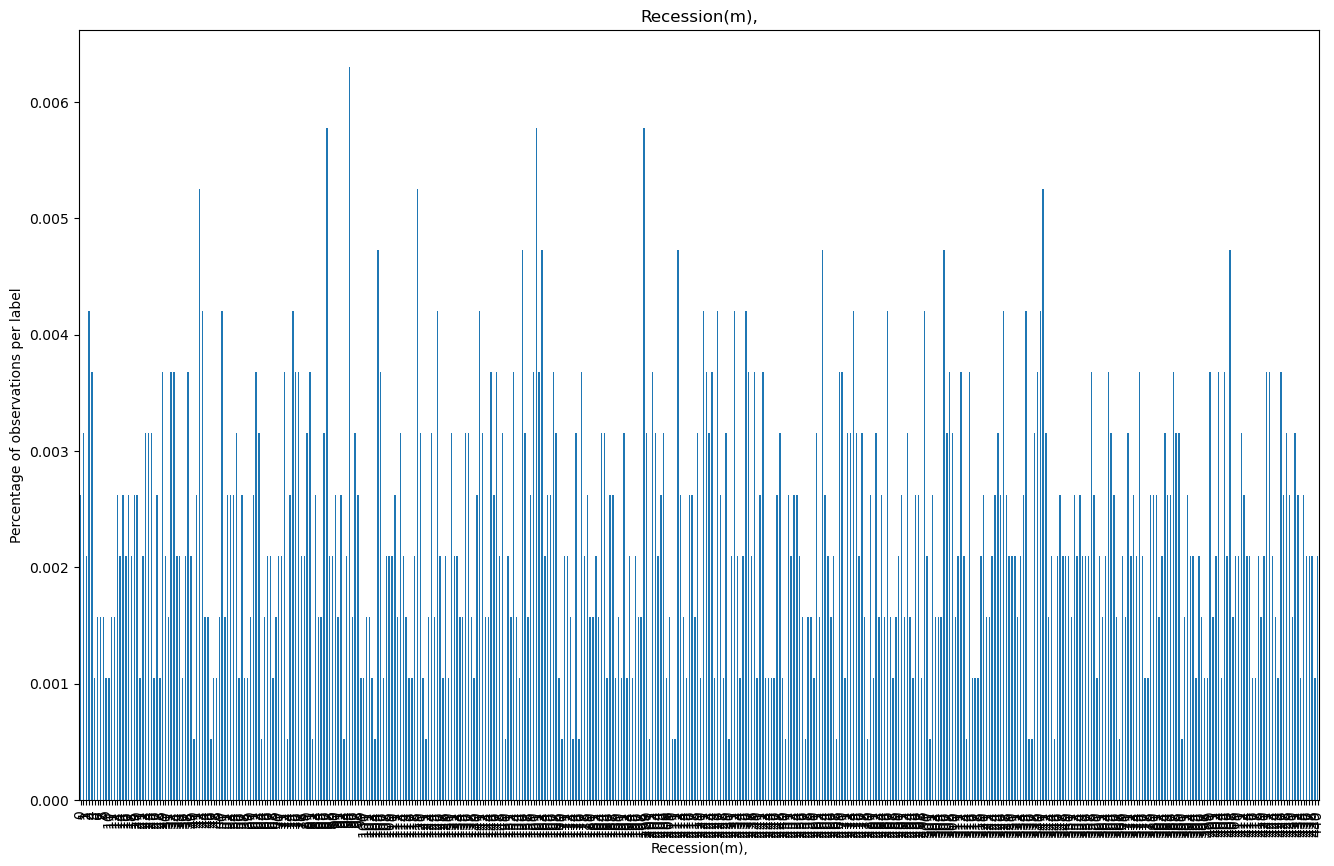

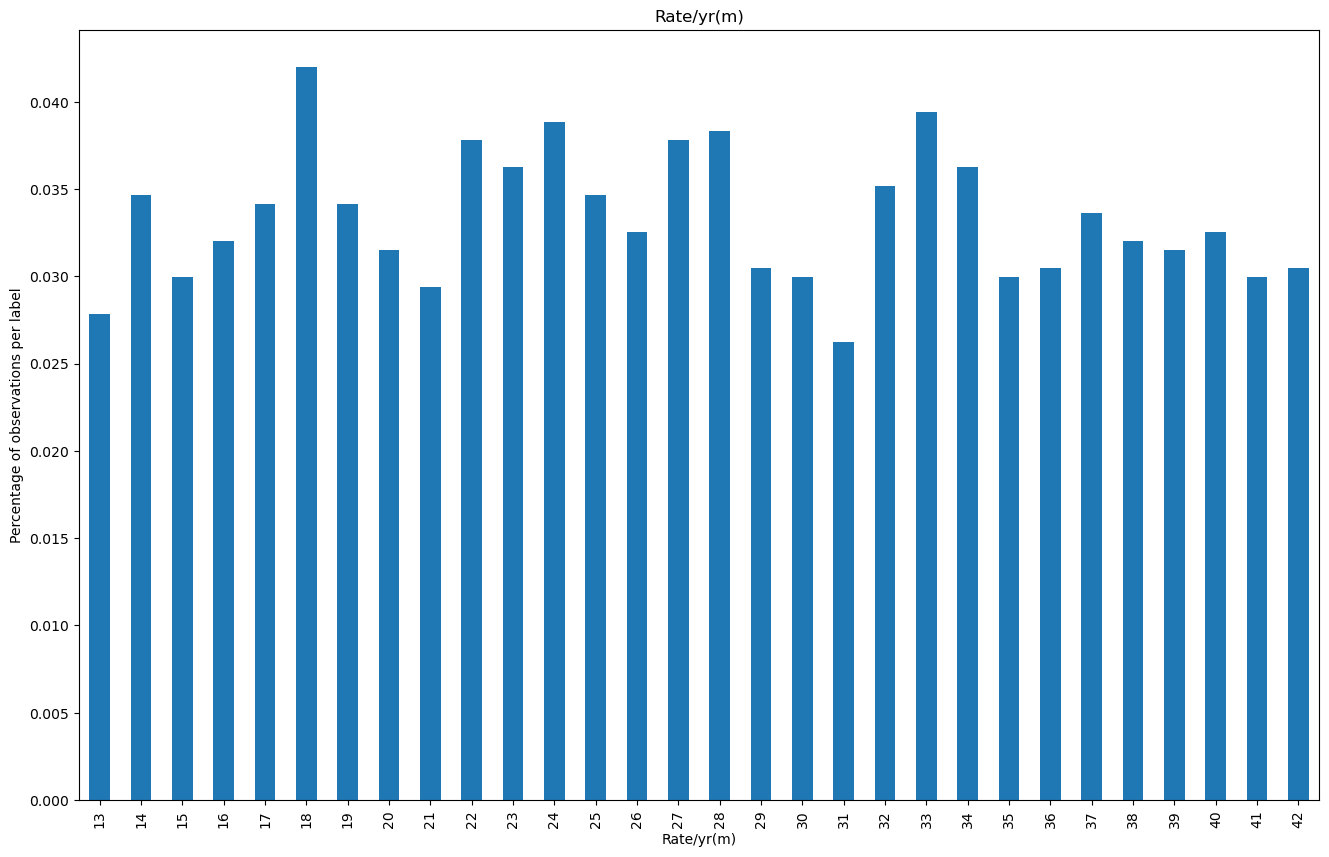

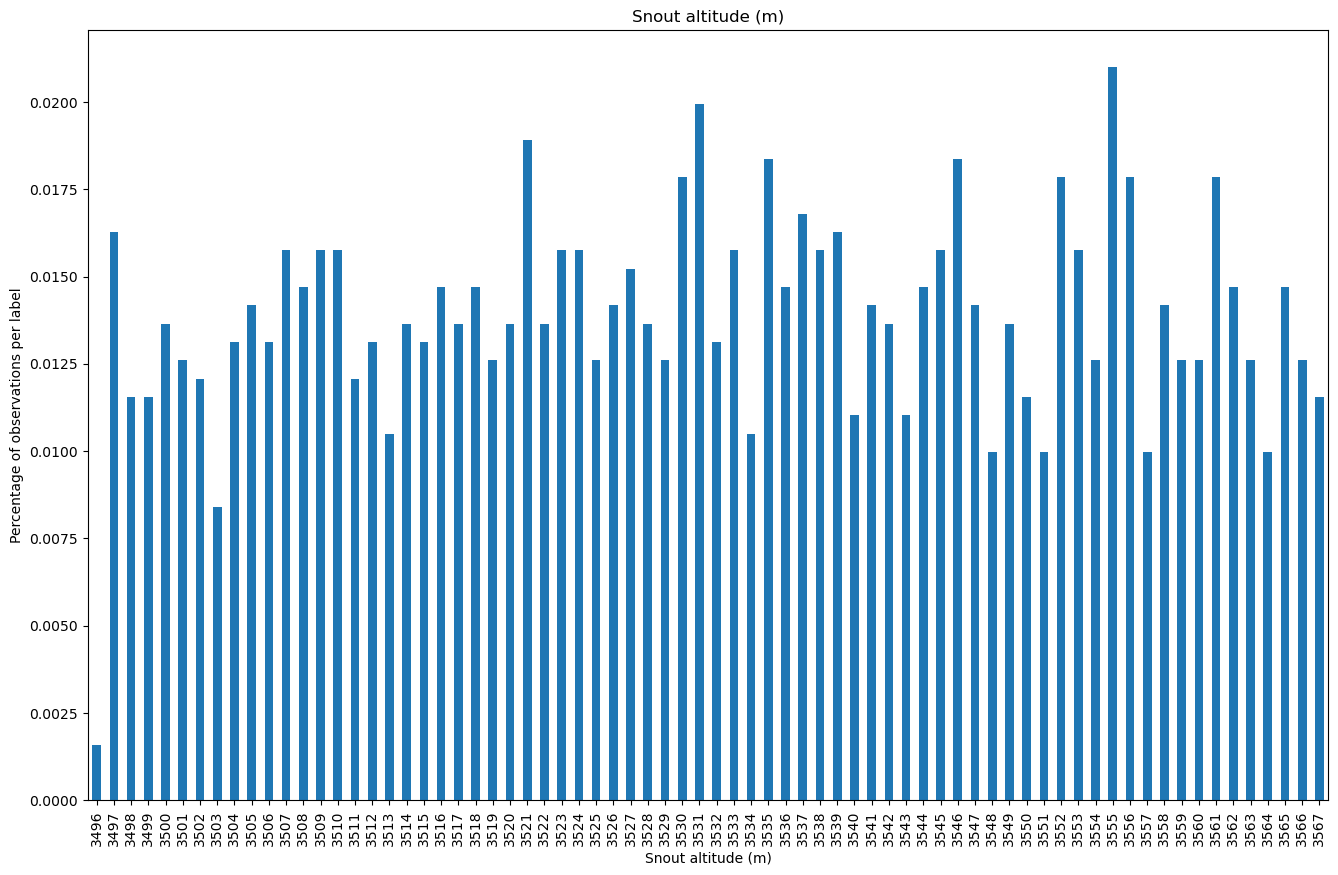

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()